In [237]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date
from collections import namedtuple
import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from skimage.filters import threshold_local

In [238]:
homePath_train = "/home/giang/Desktop/ThucTap/charTrainset/"

In [239]:
chars = [chr(i) for i in range(65, 91)]
for i in range(0, 10):
    chars.append(str(i))
# print(len(chars))
# chars = [str(i) for i in range(0,10)]
NUM_TRAIN = 6500
NUM_VAL = 7300
chars.remove('I')
chars.remove('J')
chars.remove('O')
chars.remove('Q')
chars.remove('W')

In [240]:
print(size(chars))
chars

31


<ipython-input-240-a49c5d735cb6>:1: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  print(size(chars))


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'K',
 'L',
 'M',
 'N',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [241]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
            img = cv2.imread(imgPath+ image,0)
            img = cv2.resize(img, (28, 28))
#             print(img.shape)
            data.append(img)
#             data.append(img.resize((28, 28)))
#             image.resize((28, 28)), dtype=np.float32
            label.append(i)
#             kk = kk + 1;
#             if kk == 311:
#                 break
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [242]:
data,label = preprocessdata(homePath_train)

/home/giang/Desktop/ThucTap/charTrainset/A/
/home/giang/Desktop/ThucTap/charTrainset/B/
/home/giang/Desktop/ThucTap/charTrainset/C/
/home/giang/Desktop/ThucTap/charTrainset/D/
/home/giang/Desktop/ThucTap/charTrainset/E/
/home/giang/Desktop/ThucTap/charTrainset/F/
/home/giang/Desktop/ThucTap/charTrainset/G/
/home/giang/Desktop/ThucTap/charTrainset/H/
/home/giang/Desktop/ThucTap/charTrainset/K/
/home/giang/Desktop/ThucTap/charTrainset/L/
/home/giang/Desktop/ThucTap/charTrainset/M/
/home/giang/Desktop/ThucTap/charTrainset/N/
/home/giang/Desktop/ThucTap/charTrainset/P/
/home/giang/Desktop/ThucTap/charTrainset/R/
/home/giang/Desktop/ThucTap/charTrainset/S/
/home/giang/Desktop/ThucTap/charTrainset/T/
/home/giang/Desktop/ThucTap/charTrainset/U/
/home/giang/Desktop/ThucTap/charTrainset/V/
/home/giang/Desktop/ThucTap/charTrainset/X/
/home/giang/Desktop/ThucTap/charTrainset/Y/
/home/giang/Desktop/ThucTap/charTrainset/Z/
/home/giang/Desktop/ThucTap/charTrainset/0/
/home/giang/Desktop/ThucTap/char

In [243]:
x = data
y = label

In [244]:
df_label = pd.DataFrame(label, columns = ['label_'])
df_label

,label_
0,0
1,0
2,0
3,0
4,0
...,...
1832,30
1833,30
1834,30
1835,30


In [245]:
df_label.label_.value_counts()

4     67
29    67
19    66
24    65
23    64
18    64
21    63
6     63
26    62
5     62
20    62
8     61
10    60
0     60
7     60
12    60
28    60
13    60
15    58
11    57
3     57
30    57
14    56
16    56
17    55
9     54
22    54
25    54
2     54
1     54
27    45
Name: label_, dtype: int64

In [246]:
size(label)

<ipython-input-246-7338560c4d8c>:1: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  size(label)


1837

In [247]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [248]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_tt = y_test
# X_train = x
# y_train = y

In [249]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 31)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 31)

<ipython-input-249-ac1d0bc342f1>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-249-ac1d0bc342f1>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [250]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(31, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
                 batch_size=32, epochs=200, verbose=1)

model.save("digit_model_plate.h5")

Train on 1175 samples, validate on 294 samples
Epoch 1/200
1175/1175 [==============================] - 3s 3ms/step - loss: 3.2384 - accuracy: 0.4153 - val_loss: 0.3994 - val_accuracy: 0.8946
Epoch 2/200
1175/1175 [==============================] - 2s 2ms/step - loss: 0.3802 - accuracy: 0.8970 - val_loss: 0.1915 - val_accuracy: 0.9286
Epoch 3/200
1175/1175 [==============================] - 2s 2ms/step - loss: 0.1654 - accuracy: 0.9489 - val_loss: 0.1256 - val_accuracy: 0.9694
Epoch 4/200
1175/1175 [==============================] - 2s 1ms/step - loss: 0.0965 - accuracy: 0.9694 - val_loss: 0.1151 - val_accuracy: 0.9626
Epoch 5/200
1175/1175 [==============================] - 2s 1ms/step - loss: 0.1044 - accuracy: 0.9660 - val_loss: 0.1263 - val_accuracy: 0.9592
Epoch 6/200
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0601 - accuracy: 0.9838 - val_loss: 0.1233 - val_accuracy: 0.9660
Epoch 7/200
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0738

Epoch 57/200
1175/1175 [==============================] - 2s 2ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.1677 - val_accuracy: 0.9694
Epoch 58/200
1175/1175 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.1561 - val_accuracy: 0.9796
Epoch 59/200
1175/1175 [==============================] - 3s 2ms/step - loss: 0.0051 - accuracy: 0.9974 - val_loss: 0.2042 - val_accuracy: 0.9694
Epoch 60/200
1175/1175 [==============================] - 2s 2ms/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 0.2103 - val_accuracy: 0.9728
Epoch 61/200
1175/1175 [==============================] - 3s 2ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.1725 - val_accuracy: 0.9626
Epoch 62/200
1175/1175 [==============================] - 2s 2ms/step - loss: 0.0230 - accuracy: 0.9949 - val_loss: 0.1381 - val_accuracy: 0.9762
Epoch 63/200
1175/1175 [==============================] - 3s 3ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.1800 -

Epoch 113/200
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2486 - val_accuracy: 0.9762
Epoch 114/200
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.2448 - val_accuracy: 0.9762
Epoch 115/200
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.2847 - val_accuracy: 0.9762
Epoch 116/200
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.2850 - val_accuracy: 0.9762
Epoch 117/200
1175/1175 [==============================] - 2s 1ms/step - loss: 0.0054 - accuracy: 0.9966 - val_loss: 0.2539 - val_accuracy: 0.9762
Epoch 118/200
1175/1175 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 0.9983 - val_loss: 0.3124 - val_accuracy: 0.9796
Epoch 119/200
1175/1175 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 0.9966 - val_loss: 0

In [251]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.15927526466917574, 0.9864130616188049]

In [252]:
results = chars.copy()

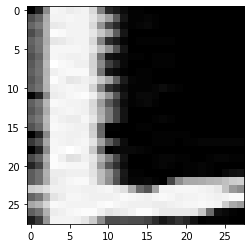

In [253]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [254]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__


'L'

In [255]:
kq = model.predict(X_test)
kq

array([[2.64962169e-26, 3.62667620e-19, 2.55777372e-21, ...,
        1.08365165e-32, 1.42912597e-23, 2.95523956e-23],
       [2.10759823e-34, 6.78603445e-22, 1.18943394e-20, ...,
        8.62409847e-20, 1.27416399e-21, 3.02166756e-27],
       [1.43562601e-11, 2.32589149e-14, 4.01924656e-22, ...,
        1.35595224e-12, 1.24703469e-14, 1.44693878e-14],
       ...,
       [7.72861553e-10, 5.92968803e-15, 1.22985248e-21, ...,
        5.83535228e-15, 7.27353637e-12, 1.95864724e-19],
       [3.19394934e-31, 8.58834619e-37, 0.00000000e+00, ...,
        3.44018766e-32, 0.00000000e+00, 1.54201378e-32],
       [1.74736339e-25, 2.05937062e-23, 1.47988056e-20, ...,
        3.99850975e-22, 6.18726383e-18, 1.65519562e-12]], dtype=float32)

In [256]:
resS = np.argmax(kq, axis=-1)
resS

array([ 9, 23, 24,  1, 30, 20, 11,  0,  3, 25,  9, 26,  2, 26, 25, 30, 14,
        7, 24,  4,  4, 10,  6, 20, 22,  4,  6, 19, 17,  5,  4, 23, 26,  8,
       18,  1,  0, 18, 18, 20,  7, 20, 19,  2, 15,  1, 14, 23,  9, 19, 24,
       13, 14, 26, 27, 25, 15, 18,  3, 20, 19, 30,  3, 28, 19, 18, 19, 20,
        5, 29, 28,  3,  1,  6, 18,  9, 11, 11, 12, 27, 26, 10, 17, 19, 17,
        4, 24, 28, 13, 10, 27, 28, 11,  5,  8, 17, 15,  2, 29,  5, 18,  1,
       21, 10, 18, 13,  6, 13, 23, 25, 17,  9, 16,  8, 16, 10, 15,  5,  6,
        5, 19,  5, 14, 11,  5, 24, 30,  4, 22,  0, 12, 29, 13, 24, 30, 24,
       28,  4, 26,  6,  7, 24, 26,  5,  9, 18, 12, 23, 13,  1, 15, 10, 25,
       16, 13,  4,  7, 16,  8, 11,  2, 28,  5, 13,  1, 25, 14, 22, 16,  2,
       10, 22,  4,  3, 10, 15, 30, 16, 14,  7, 30,  3, 26, 10,  1, 29, 15,
        6, 19, 26,  4, 25, 18, 20, 29, 29, 13, 25, 26,  8, 20, 11, 18,  9,
        2, 22, 22,  6,  1, 10, 24, 10, 30, 25, 12, 28, 24, 22, 23,  0, 17,
        8, 15,  5, 24,  6

In [257]:
print(confusion_matrix(y_tt, resS))

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  1  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

In [264]:
def PrintResult(path):
    im = cv2.imread(path, 1)
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # giảm noise và tăng edge
    noise_removal = cv2.bilateralFilter(im_gray,9,75,75)
    # can bang anh ( không quá sáng hoặc tối )
    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)
    # xoa phong k can thiet
    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
    # phat hien canh
    canny_image = cv2.Canny(thresh_image,250,255)
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)


    contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # _,cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None
    for c in contours:
        # tinh chu vi cua tung contours
        peri = cv2.arcLength(c, True) 
        # xap xi da giac
        approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
        # giu lai hinh chu nhat ( co 4 canh )
        if len(approx) == 4:
            screenCnt = approx
            break

    # tim box theo screenCnt
    (x,y,w,h) = cv2.boundingRect(screenCnt)
    
    cv2.rectangle(im,(x,y),(x+w,y+h),color=(0,255,0),thickness=2)
    roi = im[y:y+h,x:x+w]
    roi_img = im[y:y+h,x:x+w]
#     print(screenCnt)

    roi = cv2.resize(roi, (200, 200))
    roi_img = roi
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_blur = cv2.GaussianBlur(roi,(3,3),1)
    ret,thre = cv2.threshold(roi_blur,152,255,cv2.THRESH_BINARY_INV)
    thre = cv2.adaptiveThreshold(roi_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                   cv2.THRESH_BINARY_INV,45,1)
    kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    thre_mor = cv2.morphologyEx(thre,cv2.MORPH_DILATE,kerel3)
    thre_mor = thre
    cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    areas_ind = {}
    areas = []

    for ind,cnt in enumerate(cont) :
        area = cv2.contourArea(cnt)
        areas_ind[area] = ind
        areas.append(area)
    
#     string = ""
    string = namedtuple("string", ['string_value', 'loc'])
    
    string_plate = []
    x_be = 0
    MIN_SIZE = 17
    for i in areas:
        (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
        print("h = ", h, ",   w = ", w)
        if y > 90:
            continue
#       bo qua nhieu
        if (h < 30 or w < MIN_SIZE):
            continue
#       bo qua khung
        if (h > 100 or w > 100):
            continue
            
        cv2.rectangle(roi_img,(x,y),(x+w,y+h),(0,255,0),2)
        
#         cat ra de nhan dien
        roi = thre_mor[y:y+h,x:x+w]
        roi = cv2.resize(roi, (28, 28))
#         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
#         plt.show()
        test_x = reshape(roi,(-1,28,28,1))
        test_logits = model.predict(test_x)
        
        # lấy phần tử có giá trị lớn nhất 
        test_logits = np.argmax(test_logits, axis=-1)
        
        res__ = results[int(test_logits)]
        print("digit = ", res__)
        cv2.putText(roi_img, str(res__), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 0), 3)
        
        string_plate.append(string(str(res__), x))
    
    string_plate = sorted(string_plate, key = lambda x: x.loc)
    
    bien_so_xe = ""
#     print(string_plate)
    it = 0

    for i in string_plate:
        bien_so_xe += i.string_value
        it += 1
        if it == 2:
            bien_so_xe += "-"
    
    bien_so_xe += " "
    string_plate = []
    
    for i in areas:
        (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
        print("h = ", h, ",   w = ", w)
        if y <= 90:
            continue
#       bo qua nhieu
        if (h < 30 or w < MIN_SIZE):
            continue
#       bo qua khung
        if (h > 100 or w > 100):
            continue
            
        cv2.rectangle(roi_img,(x,y),(x+w,y+h),(0,255,0),2)
        
#         cat ra de nhan dien
        roi = thre_mor[y:y+h,x:x+w]
        roi = cv2.resize(roi, (28, 28))
#         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
#         plt.show()
        test_x = reshape(roi,(-1,28,28,1))
        test_logits = model.predict(test_x)
        
        # lấy phần tử có giá trị lớn nhất 
        test_logits = np.argmax(test_logits, axis=-1)
        
        res__ = results[int(test_logits)]
        print("digit = ", res__)
        cv2.putText(roi_img, str(res__), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 0), 3)
        
        string_plate.append(string(str(res__), x))
    
    string_plate = sorted(string_plate, key = lambda x: x.loc)
    
    it = 0

    for i in string_plate:
        bien_so_xe += i.string_value
        it += 1
        
    plt.imshow(cv2.cvtColor(roi_img,cv2.COLOR_BGR2RGB))
    plt.title(bien_so_xe)
    plt.show()

h =  75 ,   w =  26
h =  74 ,   w =  26
h =  75 ,   w =  26
h =  74 ,   w =  27
h =  26 ,   w =  10
h =  13 ,   w =  16
h =  2 ,   w =  2
h =  8 ,   w =  3
h =  17 ,   w =  12
h =  6 ,   w =  3
h =  72 ,   w =  25
digit =  6
h =  73 ,   w =  18
digit =  1
h =  73 ,   w =  24
digit =  T
h =  73 ,   w =  25
digit =  3
h =  19 ,   w =  165
h =  8 ,   w =  21
h =  8 ,   w =  9
h =  194 ,   w =  13
h =  198 ,   w =  188
h =  25 ,   w =  9
h =  4 ,   w =  2
h =  75 ,   w =  26
digit =  2
h =  74 ,   w =  26
digit =  2
h =  75 ,   w =  26
digit =  2
h =  74 

<ipython-input-264-ed8dac9b12de>:86: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  test_x = reshape(roi,(-1,28,28,1))
<ipython-input-264-ed8dac9b12de>:132: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  test_x = reshape(roi,(-1,28,28,1))


,   w =  27
digit =  2
h =  26 ,   w =  10
h =  13 ,   w =  16
h =  2 ,   w =  2
h =  8 ,   w =  3
h =  17 ,   w =  12
h =  6 ,   w =  3
h =  72 ,   w =  25
h =  73 ,   w =  18
h =  73 ,   w =  24
h =  73 ,   w =  25
h =  19 ,   w =  165
h =  8 ,   w =  21
h =  8 ,   w =  9
h =  194 ,   w =  13
h =  198 ,   w =  188
h =  25 ,   w =  9
h =  4 ,   w =  2


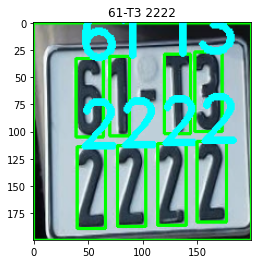

In [265]:
img_path = "/home/giang/Desktop/Test/TestML/xe10.jpg"
PrintResult(img_path)


In [260]:
so6 = cv2.imread("/home/giang/Desktop/ThucTap/so6.jpg", 0)
so6 = cv2.resize(so6, (28, 28))
test_so6 = reshape(so6,(-1,28,28,1))
y_predict = model.predict(test_so6.reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__

<ipython-input-260-a004bab1ca3f>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  test_so6 = reshape(so6,(-1,28,28,1))


'6'